In [4]:
import pandas as pd
import nltk
import matplotlib.pyplot as plt
import numpy as np
import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from scipy.interpolate import make_interp_spline
from textwrap import wrap

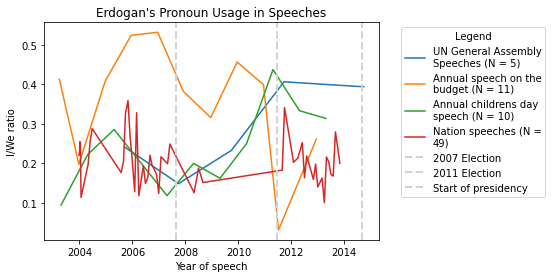

In [5]:
we_words = ["we", "our", "ours", "us", "ourselves"]
i_words = ["i", "my", "mine", "me", "myself"]
pronouns = {"We": we_words, "I": i_words}

directory = "C:/Users/emilysallens/Desktop/Senior Thesis/Analysis/PMSpeeches/"
contexts = {
            "Metadata/UN.xlsx": "UN General Assembly Speeches",
            "Metadata/FiscalYear.xlsx": "Annual speech on the budget",
            "Metadata/ChildrensDay.xlsx": "Annual childrens day speech",
            # "Metadata/GroupSpeeches.xlsx": "AKP group talks",
            # "Metadata/RallySpeeches.xlsx": "Rally speeches",
            "Metadata/NationSpeeches.xlsx": "Nation speeches"
}

for context, label in contexts.items():
    x_list, y_list, y_list_we, y_list_i = [], [], [], []
    df = pd.read_excel(directory + context)
    for index, row in df.iterrows():
        filename = directory + row["filename"]
        skip = ["Speech84.txt", "UNSpeech6.txt","UNSpeech7.txt", "UNSpeech8.txt","UNSpeech9.txt","UNSpeech10.txt","UNSpeech11.txt"]
        if row["filename"] in skip:
            continue
        try:
            text_file = open(filename, "r", encoding="mbcs")
            speech = text_file.read().lower()
            tokenized_list = nltk.word_tokenize(speech)
            word_count = len(tokenized_list)
            we_count = i_count = 0
            for word in we_words:
                we_count += tokenized_list.count(word)
            for word in i_words:
                i_count += tokenized_list.count(word)
            date_time_obj = datetime.datetime.strptime(df.at[index, "date"], '%d.%m.%Y')
            x_list.append(date_time_obj)
            y_list.append(i_count / we_count)
            y_list_we.append(1000 *we_count / len(tokenized_list))
            y_list_i.append(1000 * i_count / len(tokenized_list))

        except:
            print("Failed to find file:", filename)
            continue

    num_speeches = len(x_list)
    label = '\n'.join(wrap(label + " (N = " + str(num_speeches) + ")", 20))
    y_list = y_list
    x_list, y_list = zip(*sorted(zip(mdates.date2num(x_list), y_list)))
    X_Y_Spline = make_interp_spline(x_list, y_list)

    Y_ = X_Y_Spline(x_list)
    plt.plot(x_list, Y_, label=label)
    # plt.scatter(mdates.date2num(x_list), y_list, label=label)
oath = datetime.datetime.strptime('2014-08-28', "%Y-%m-%d")
# plt.axvline(x=oath, ymin=0, ymax=1, color='lightgrey', ls=':', lw=2, label="Start of presidency")
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
# xticks = pd.date_range(datetime.datetime(2009,1,1), datetime.datetime(2012,1,1), freq='YS')

election_2007 = datetime.datetime.strptime('2007-08-22', "%Y-%m-%d")
label = '\n'.join(wrap('2007 Election', 20))
plt.axvline(x=election_2007, ymin=0, ymax=1, color='lightgrey', ls='--', lw=2, label=label)
# plt.xticks(xticks)
election_2011 = datetime.datetime.strptime('2011-06-12', "%Y-%m-%d")
label = '\n'.join(wrap('2011 Election', 20))

plt.axvline(x=election_2011, ymin=0, ymax=1, color='lightgrey', ls='--', lw=2, label=label)


oath = datetime.datetime.strptime('2014-08-28', "%Y-%m-%d")
label = '\n'.join(wrap('Start of presidency', 20))

plt.axvline(x=oath, ymin=0, ymax=1, color='lightgrey', ls='--', lw=2, label=label)
plt.legend(title="Legend", bbox_to_anchor=(1.05, 1.0), loc='upper left')

plt.title("Erdogan's Pronoun Usage in Speeches")
plt.xlabel("Year of speech")
plt.ylabel("I/We ratio")
plt.show()